## Questo notebook considera il dataset "Bike Sharing"
La rappresentazione canonica di un dataset è la seguente.<br>
E' una matrice di dati $X \in R^{n \times p}$ dove: <br>
$\hspace{1cm}\bullet \hspace{0.5cm}n$ è il numero di campioni<br>
$\hspace{1cm}\bullet \hspace{0.5cm}p$ è il numero di features

Sulle righe ci sono i campioni mentre sulle colonne le features:<br>
$\hspace{1cm}\bullet \hspace{0.5cm} x_{i} \in R^{p} \rightarrow$ ogni campione è un vettore in uno spazio $p$-dimensionale<br>
$\hspace{1cm}\bullet \hspace{0.5cm} p_{j} \in R^{n} \rightarrow$ ogni feature è un vettore in uno spazio $n$-dimensionale<br>

# Importing e comprensione del dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bike = pd.DataFrame(pd.read_csv('day.csv',delimiter=','))
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Verifica delle informazioni descrittive
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
n = np.shape(bike)[0]
p = np.shape(bike)[1]
print("Dimensione del dataset: {}\n\t* Numero di campioni:\t{}\n\t* Numero di features:\t{}"
      .format(np.shape(bike), n, p))

Dimensione del dataset: (731, 16)
	* Numero di campioni:	731
	* Numero di features:	16


## Scoperta :

Il dataset ha 731 righe e 16 colonne.

Eccetto una colonna, tutte le altre solo di tipo float o integer.

Una colonna è di tipo data.

Guardando i dati, sembrano esserci alcune features categoriche espresse tramite integer/float.

Si analizzeranno tali casi per comprendere se convertirli a categorici o trattarli come integer

# Verifica della qualità dei dati
## Verifica di valori NULL/MISSING

In [6]:
# percentuale di valori nulli in ogni colonna
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Scoperta

Non ci sono valori NULL/MISSING

# Verifica dei duplicati

In [7]:
bike_dup = bike.copy()

#Verifica dei duplicati rimuovendo l'intera riga duplicata se presente
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(731, 16)

## Scoperta

Le dimensioni restano invariate nonostante la rimozione dei duplicati.

Si può concludere che vi è assenza di valori duplicati nel dataset

# Data Cleaning

# Rimozione delle features ridondanti

Sulla base di una visione ad alto livello dei dati, le seguenti variabili possono essere rimosse:

- **instant** : contiene valori di indice

- **dteday** : è una data, dal momento che nel dataset sono presenti le colonne 'yr' e 'mnth' è possibile rimuovere tale colonna

- **casual** & **registered**: entrambe le colonne contengono il conteggio delle biciclette noleggiate da differenti categorie di clienti. Dal momento che l'obiettivo è quello di trovare il numero totale di bicilette e non quelle di una specifica categoria possiamo ignorare queste due colonne.

- Si è salvato il nuovo dataframe in bike_new, così che l'originale sia preservato per ogni futura analisi/validazione

In [8]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


# Creazione di variabili dummy

Si creano variabili dummy per 4 features categoriche 'mnth', 'weekday', 'season' e 'weathersit'.

- Prima della creazione delle variabili dummy è necessario convertirle

In [10]:
# Verifica del tipo dei dati prima della conversione
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.7 KB


In [11]:
# Conversione al tipo dati 'category'

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [12]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      731 non-null    category
 1   yr          731 non-null    int64   
 2   mnth        731 non-null    category
 3   holiday     731 non-null    int64   
 4   weekday     731 non-null    category
 5   workingday  731 non-null    int64   
 6   weathersit  731 non-null    category
 7   temp        731 non-null    float64 
 8   atemp       731 non-null    float64 
 9   hum         731 non-null    float64 
 10  windspeed   731 non-null    float64 
 11  cnt         731 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [13]:
# 1)Creazione delle variabili dummy
# 2)Rimozione della variabile originale per le variabili convertite

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            731 non-null    int64  
 1   holiday       731 non-null    int64  
 2   workingday    731 non-null    int64  
 3   temp          731 non-null    float64
 4   atemp         731 non-null    float64
 5   hum           731 non-null    float64
 6   windspeed     731 non-null    float64
 7   cnt           731 non-null    int64  
 8   season_2      731 non-null    uint8  
 9   season_3      731 non-null    uint8  
 10  season_4      731 non-null    uint8  
 11  mnth_2        731 non-null    uint8  
 12  mnth_3        731 non-null    uint8  
 13  mnth_4        731 non-null    uint8  
 14  mnth_5        731 non-null    uint8  
 15  mnth_6        731 non-null    uint8  
 16  mnth_7        731 non-null    uint8  
 17  mnth_8        731 non-null    uint8  
 18  mnth_9        731 non-null    

In [14]:
bike_new.shape

(731, 30)

# Split dei dati
- Split dei dati in train e test (70/30)

In [15]:
from sklearn.model_selection import train_test_split
# Settando 'random_state' i dati di train e test considerano sempre le stesse righe
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

Verifica delle info e delle dimensioni dopo lo split:

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 698 to 419
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            511 non-null    int64  
 1   holiday       511 non-null    int64  
 2   workingday    511 non-null    int64  
 3   temp          511 non-null    float64
 4   atemp         511 non-null    float64
 5   hum           511 non-null    float64
 6   windspeed     511 non-null    float64
 7   cnt           511 non-null    int64  
 8   season_2      511 non-null    uint8  
 9   season_3      511 non-null    uint8  
 10  season_4      511 non-null    uint8  
 11  mnth_2        511 non-null    uint8  
 12  mnth_3        511 non-null    uint8  
 13  mnth_4        511 non-null    uint8  
 14  mnth_5        511 non-null    uint8  
 15  mnth_6        511 non-null    uint8  
 16  mnth_7        511 non-null    uint8  
 17  mnth_8        511 non-null    uint8  
 18  mnth_9        511 non-null  

In [17]:
df_train.shape

(511, 30)

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 314
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   cnt           220 non-null    int64  
 8   season_2      220 non-null    uint8  
 9   season_3      220 non-null    uint8  
 10  season_4      220 non-null    uint8  
 11  mnth_2        220 non-null    uint8  
 12  mnth_3        220 non-null    uint8  
 13  mnth_4        220 non-null    uint8  
 14  mnth_5        220 non-null    uint8  
 15  mnth_6        220 non-null    uint8  
 16  mnth_7        220 non-null    uint8  
 17  mnth_8        220 non-null    uint8  
 18  mnth_9        220 non-null   

In [19]:
df_test.shape

(220, 30)

In [20]:
df_test.shape

(220, 30)

# Exploratory Data Analysis
## Visualizzazione variabili numeriche

In [21]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

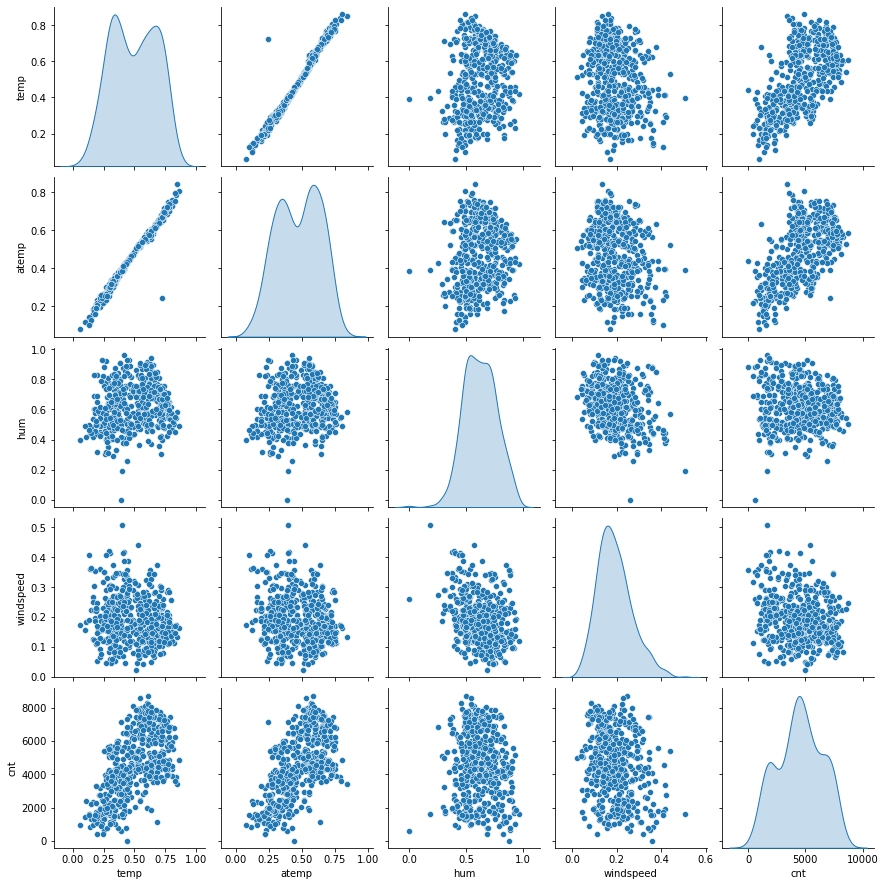

In [22]:
# Creazione di un nuovo dataframe contenente solo variabili numeriche:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Scoperte
- Il pairplot evidenzia la presenza di una relazione lineare tra 'temp','atemp' e 'cnt'.
# Visualizzazione delle variabili categoriche

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 698 to 419
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            511 non-null    int64  
 1   holiday       511 non-null    int64  
 2   workingday    511 non-null    int64  
 3   temp          511 non-null    float64
 4   atemp         511 non-null    float64
 5   hum           511 non-null    float64
 6   windspeed     511 non-null    float64
 7   cnt           511 non-null    int64  
 8   season_2      511 non-null    uint8  
 9   season_3      511 non-null    uint8  
 10  season_4      511 non-null    uint8  
 11  mnth_2        511 non-null    uint8  
 12  mnth_3        511 non-null    uint8  
 13  mnth_4        511 non-null    uint8  
 14  mnth_5        511 non-null    uint8  
 15  mnth_6        511 non-null    uint8  
 16  mnth_7        511 non-null    uint8  
 17  mnth_8        511 non-null    uint8  
 18  mnth_9        511 non-null  

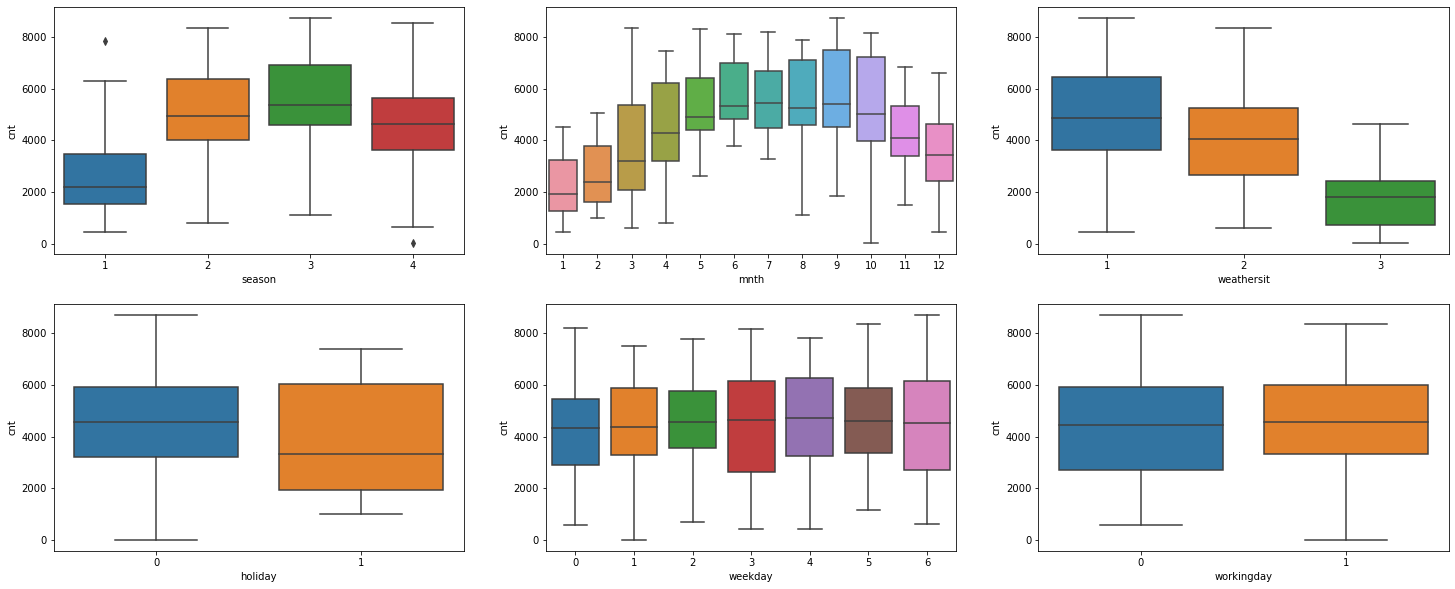

In [24]:
# Boxplot per le variabili categoriche (prima della creazione dei dummies) in confronto alla variabile target 'cnt'

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

## Scoperte
Nel dataset ci sono 6 variabili categoriche.

E' stato utilizzato un box plot per studiare il loro effetto sulla variabile dipendente.

L'inferenza scoperta è la seguente:

- **season**: La maggioranza delle biciclette sono state noleggiate nella season3 con una mediana di più di 5000 noleggi (per il periodo di 2 anni). A seguire ci sono la season2 e season4. Questo indica che le stagioni possono essere dei buoni predittori della variabile dipendente

- **mnth**: La maggioranza delle biciclette sono state noleggiate nei mesi 5,6,7,8,9 e 10 con una medianda di più di 4000 noleggi per mese. Ciò indica che mnth ha qualche trend per i noleggi e può essere un buon predittore.

- **weathersit**: La maggioranza delle biciclette sono state noleggiate durante il ‘weathersit1' con una mediana vicina a 5000 noleggi (per un periodo di 2 anni). A seguire c'è la weathersit2. Ciò indica che weathersit mostra un trend e può essere un buon predittore.

- **holiday**: La maggioranza delle biciclette sono state noleggiate durante periodi in cui non è vacanza, il che mostra la presenza di bias. Ciò indica che holiday non può essere un buon predittore.

- **weekday** : mostra un trend con una mediana tra i 4000 e i 5000 noleggi. Questa variabile può avere poca o nessuna influenza sulla variabile di ouptut. Verrà lasciato decidere al modello l'importanza della variabile.

- **workingday**: La maggioranza delle biciclette sono state noleggiate durante 'workingday' con una mediana vicina a 5000 noleggi (per un periodo di 2 anni). Ciò indica che la variabile può essere un buon predittore.

# Matrice di correlazione

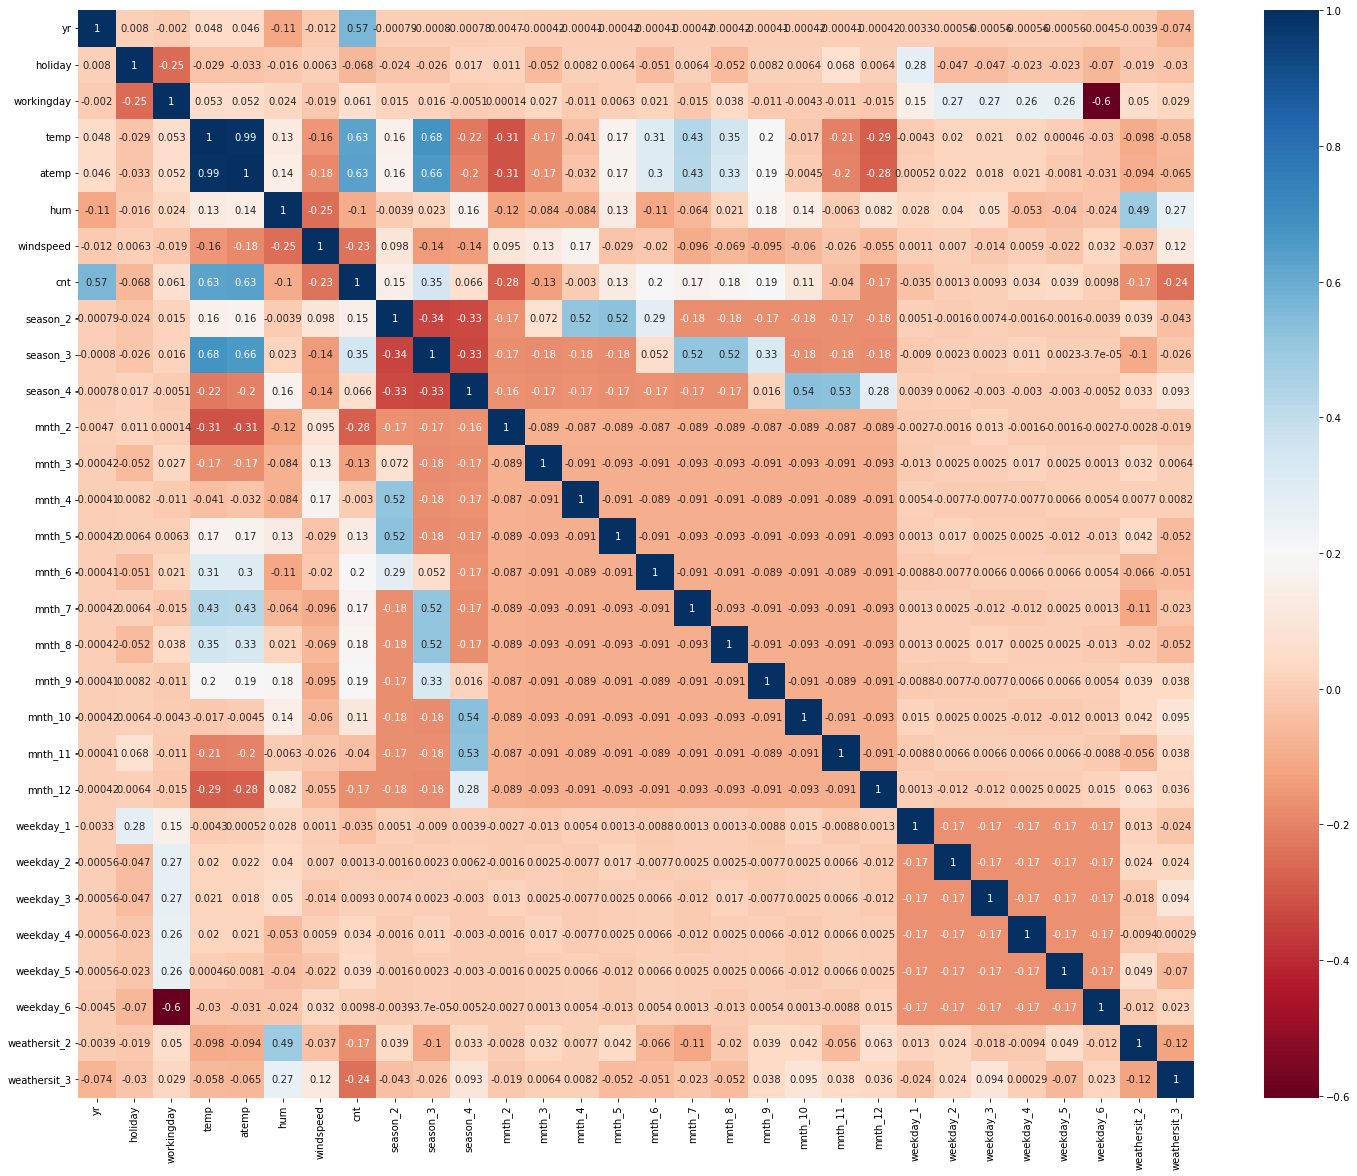

In [25]:
# Verifica dei coefficienti di correlazione per verificare quali variabili sono correlate tra loro
# Si considerano solo le variabili scelte per l'analisi (df: bike_new)
plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

## Scoperte:
- La heatmap mostra chiaramente che diverse variabili sono correlate tra loro e che alcune variabili esplicative hanno una buona correlazione con la variabile target.

# Scaling delle features

In [26]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
698,1,0,1,0.280870,0.298422,0.555652,0.115522,5323,0,0,...,1,0,0,0,0,1,0,0,0,0
287,0,0,0,0.506667,0.498725,0.483333,0.258083,5217,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.771667,0.703292,0.550833,0.156717,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
715,1,0,0,0.362500,0.369938,0.838750,0.100742,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.138333,0.116175,0.434167,0.361950,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.preprocessing import MinMaxScaler
# Applicazione dello scaler alle variabili numeriche
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
698,1,0,1,0.276298,0.287930,0.577301,0.191993,0.609871,0,0,...,1,0,0,0,0,1,0,0,0,0
287,0,0,0,0.557653,0.550854,0.502164,0.485890,0.597676,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
715,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


# Costruzione del modello lineare

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

## RFE

Dato uno stimatore esterno che assegna pesi alle features (ad esempio, i coefficienti di un modello lineare), l'obiettivo del RFE è selezionare le features considerando ricorsivamente insiemi di caratteristiche sempre più piccoli. In primo luogo, lo stimatore viene addestrato sull'insieme iniziale di features. Successivamente le features meno importanti vengono eliminate dall'insieme. Tale procedura viene ripetuta in ricorsivamente sul set potato fino a quando non viene raggiunto il numero desiderato di funzioni da selezionare.

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE con numero di variabili di output = 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 7),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', False, 14),
 ('weekday_2', False, 15),
 ('weekday_3', False, 10),
 ('weekday_4', False, 9),
 ('weekday_5', False, 11),
 ('weekday_6', False, 5),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_5', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [33]:
# Creazione del dataframe X_train_rfe con le variabili selezionate dal RFE
X_train_rfe = X_train[col]

# Costruzione del modello utilizzando Stats Models

Durante questa fase verranno considerati due fattori principali:
- **VIF**: Il Variance Inflation Factor è una misura per controllare l'aumento della varianza delle stime dei parametri se alla regressione lineare viene aggiunta una variabile. È una misura per la verifica della multicollinearità. Se il VIF è maggiore di 5, la variabile esplicativa considerata è altamente correlata con le altre variabili esplicative e per questo motivo aumenteranno gli errori nelle stime dei parametri.
- **P-Value**: Considerando la correlazione tra features questo valore esprime la probabilità che l'ipotesi nulla sia vera. In questo caso rappresenta la probabilità che la correlazione tra x e y nei dati sia verificata in maniera casuale. Di conseguenza sono preferibili p-values più bassi, dato che indicano minore correlazione tra le features.

## Modello 1

In [34]:
# Verifica dei valori di VIF per le features. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creazione di un dataframe che conterrà i nomi di tutte le variabili con i loro VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,383.47
3,atemp,363.77
4,hum,15.62
7,season_3,7.00
5,windspeed,4.62
6,season_2,3.75
8,season_4,2.90
13,weathersit_2,2.09
0,yr,2.05
10,mnth_5,1.70


In [35]:
import statsmodels.api as sm

X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()
lr1.params

const           0.232065
yr              0.233319
holiday        -0.072598
temp            0.399413
atemp           0.054370
hum            -0.178427
windspeed      -0.151607
season_2        0.131942
season_3        0.091282
season_4        0.160503
mnth_3          0.041252
mnth_5          0.041037
mnth_9          0.108886
mnth_10         0.059319
weathersit_2   -0.052450
weathersit_3   -0.257713
dtype: float64

In [36]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.9
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          8.80e-190
Time:                        14:48:55   Log-Likelihood:                 516.16
No. Observations:                 511   AIC:                            -1000.
Df Residuals:                     495   BIC:                            -932.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2321      0.028      8.325   

## Modello 2
- Rimozione della variabile 'atemp' sulla base del suo p-value e VIF

In [37]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,22.64
3,hum,15.23
6,season_3,6.92
4,windspeed,4.48
5,season_2,3.75
7,season_4,2.89
12,weathersit_2,2.08
0,yr,2.05
9,mnth_5,1.70
11,mnth_10,1.66


In [39]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.params

const           0.232842
yr              0.233267
holiday        -0.072863
temp            0.450694
hum            -0.177717
windspeed      -0.153622
season_2        0.132031
season_3        0.090450
season_4        0.160764
mnth_3          0.041376
mnth_5          0.040917
mnth_9          0.108887
mnth_10         0.059351
weathersit_2   -0.052614
weathersit_3   -0.258346
dtype: float64

In [40]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     194.2
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          6.72e-191
Time:                        14:48:56   Log-Likelihood:                 516.08
No. Observations:                 511   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -938.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2328      0.028      8.380   

## Modello 3
- Rimozione della variabile 'hum' sulla base di un alto valore VIF 
- Anche se è il secondo valore più alto si è deciso di rimuoverre 'hum' e non 'temp' dato che la temperatura può essere un fattore importante per un settore come quello del noleggio di biciclette.

In [41]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.58
5,season_3,6.69
3,windspeed,3.87
4,season_2,3.72
6,season_4,2.74
0,yr,2.04
8,mnth_5,1.69
10,mnth_10,1.66
11,weathersit_2,1.48
9,mnth_9,1.28


In [43]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()

lr3.params

const           0.129196
yr              0.237537
holiday        -0.071651
temp            0.423286
windspeed      -0.118241
season_2        0.134929
season_3        0.096745
season_4        0.156092
mnth_3          0.046707
mnth_5          0.032033
mnth_9          0.099774
mnth_10         0.056273
weathersit_2   -0.081105
weathersit_3   -0.309904
dtype: float64

In [44]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.5
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          3.46e-187
Time:                        14:48:56   Log-Likelihood:                 504.48
No. Observations:                 511   AIC:                            -981.0
Df Residuals:                     497   BIC:                            -921.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1292      0.018      7.230   

## Modello 4
- Rimozione di 'season3' sulla base dell'alto valor VIF.
- Anche se è il secondo valore più alto si è deciso di rimuoverre 'season3' e non 'temp' dato che la temperatura può essere un fattore importante per settore come il noleggio di biciclette.

In [45]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.07
3,windspeed,3.66
4,season_2,2.14
0,yr,2.02
5,season_4,1.89
7,mnth_5,1.63
9,mnth_10,1.63
10,weathersit_2,1.47
8,mnth_9,1.23
6,mnth_3,1.16


In [47]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.params

const           0.114061
yr              0.234817
holiday        -0.077143
temp            0.545538
windspeed      -0.126076
season_2        0.087687
season_4        0.123365
mnth_3          0.032119
mnth_5          0.017111
mnth_9          0.115029
mnth_10         0.044076
weathersit_2   -0.081695
weathersit_3   -0.301416
dtype: float64

In [48]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.8
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          8.44e-184
Time:                        14:48:56   Log-Likelihood:                 493.65
No. Observations:                 511   AIC:                            -961.3
Df Residuals:                     498   BIC:                            -906.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1141      0.018      6.363   

# Modello 5
- Rimozione della variabile 'mnth_5' sulla base del suo alto p-value

In [49]:
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.01
3,windspeed,3.62
0,yr,2.02
5,season_4,1.89
8,mnth_10,1.63
4,season_2,1.56
9,weathersit_2,1.47
7,mnth_9,1.22
6,mnth_3,1.14
10,weathersit_3,1.10


In [51]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.params

const           0.114555
yr              0.234790
holiday        -0.076937
temp            0.546827
windspeed      -0.128722
season_2        0.093804
season_4        0.123230
mnth_3          0.030343
mnth_9          0.114455
mnth_10         0.043852
weathersit_2   -0.081632
weathersit_3   -0.301798
dtype: float64

In [52]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     223.4
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          8.93e-185
Time:                        14:48:56   Log-Likelihood:                 493.16
No. Observations:                 511   AIC:                            -962.3
Df Residuals:                     499   BIC:                            -911.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1146      0.018      6.393   

# Modello 6
- Rimozione della variabile 'mnth_3' per il suo alto p-value

In [53]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.98
3,windspeed,3.44
0,yr,2.01
5,season_4,1.87
7,mnth_10,1.63
4,season_2,1.56
8,weathersit_2,1.47
6,mnth_9,1.22
9,weathersit_3,1.09
1,holiday,1.03


In [55]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()
lr6.params

const           0.122095
yr              0.235495
holiday        -0.079225
temp            0.538293
windspeed      -0.127565
season_2        0.093731
season_4        0.118670
mnth_9          0.113143
mnth_10         0.044524
weathersit_2   -0.081761
weathersit_3   -0.299111
dtype: float64

In [56]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Mon, 08 Nov 2021   Prob (F-statistic):          3.65e-185
Time:                        14:48:56   Log-Likelihood:                 491.22
No. Observations:                 511   AIC:                            -960.4
Df Residuals:                     500   BIC:                            -913.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1221      0.018      6.959   

# Interpretazione del modello finale

**valori dei coefficienti del modello lr6**
 
- const           0.122095
- yr              0.235495
- holiday        -0.079225
- temp            0.538293
- windspeed      -0.127565
- season_2        0.093731
- season_4        0.118670
- mnth_9          0.113143
- mnth_10         0.044524
- weathersit_2   -0.081761
- weathersit_3   -0.299111


## F Statistics

Le F-Statistics sono utilizzate per testare di significatività generale del modello: più alte sono, più significativo è il modello.

- F-statistic: 244
- Prob (F-statistic): 3.65e-185

Il valore di 244 (>1) per le F-Statistics ed il p-value di '~0.0000' dimostra che il modello è significativo.

## Equazione del miglior fit basata sul modello lr6:

cnt = 0.122095 + (yr × 0.235495) - (holiday × 0.079225) + (temp × 0.538293) − (windspeed × 0.127565) + (season2 × 0.093731) + (season4 × 0.118670) + (mnth_9 × 0.113143) + (mnth_10 × 0.044524) − (weathersit2 × 0.081761) − (weathersit3 × 0.299111)

## Interpretazione dei coefficienti:

- **yr**: Un coefficiente di 0.235495 indica che un aumento unitario della variabile yr fa crescere il numero di noleggi di biciclettte di 0.235495 unità.

- **holiday**: Un coefficiente di 0.079225 indica che un decremento unitario della variabile holiday fa crescere il numero di noleggi di biciclettte di 0.079225 unità.

- **temp**: Un coefficiente di 0.538293 indica che un aumento unitario della variabile temp fa crescere il numero di noleggi di biciclettte di 0.538293 unità.

- **windspeed**: Un coefficiente di 0.127565 indica che un decremento unitario della variabile windspeed fa crescere il numero di noleggi di biciclettte di 0.127565 unità.

- **season_2**: Un coefficiente di 0.093731 indica che un aumento unitario della variabile season_2 fa crescere il numero di noleggi di biciclettte di 0.093731 unità.

- **season_4**: Un coefficiente di 0.118670 indica che un aumento unitario della variabile season_4 fa crescere il numero di noleggi di biciclettte di 0.118670 unità.

- **mnth_9**: Un coefficiente di 0.113143 indica che un aumento unitario della variabile mnth_9 fa crescere il numero di noleggi di biciclettte di 0.113143 unità.

- **mnth_10**: Un coefficiente di 0.044524 indica che un aumento unitario della variabile mnth_5 fa crescere il numero di noleggi di biciclettte di 0.044524 unità.

- **weathersit_2**: Un coefficiente di 0.081761 indica che un decremento unitario della variabile weathersit_2 fa crescere il numero di noleggi di biciclettte di 0.081761 unità.

- **weathersit_3**: Un coefficiente di 0.299111 indica che un decremento unitario della variabile weathersit_3 fa crescere il numero di noleggi di biciclettte di 0.299111 unità.

- **const**: Il valore costante di 0.122095 indica che in assenza delle variabili predittrici, il noleggio di biciclette cresce di 0.122095 unità.

# Assuzione
## I termini di errore sono normalmente distribuiti con media 0
### Analisi dei residui sui dati di training

Text(0.5, 0, 'Errors')

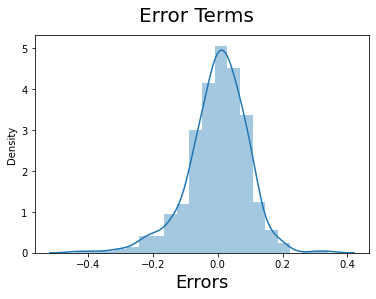

In [57]:
y_train_pred = lr6.predict(X_train_lm6)

res = y_train-y_train_pred
# Istogramma dei termini di errore
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

## Scoperte
- Dall'istogramma si può vedere che i residui sono normalmente distribuiti per cui l'assunzione per la regressione lineare è valida.

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.98
3,windspeed,3.44
0,yr,2.01
5,season_4,1.87
7,mnth_10,1.63
4,season_2,1.56
8,weathersit_2,1.47
6,mnth_9,1.22
9,weathersit_3,1.09
1,holiday,1.03


## Scoperte
- Dal calcolo delle VIF si può comprendere che non c'è multicollinearità tra le variabili predittrici, dato che i valori sono al di sotto di 5(correlazione moderata).
# PREDIZIONE CON IL MODELLO FINALE

Avendo effettuato il fit del modello e verificato le assunzioni è possibile procedere con le predizioni

## Applicazione dello scaling sul test set

In [59]:
# Applicazione dello scaling solo sulle variabili numeriche, si voule prevenire perdite di informazioni 
# dal dataset di train al test
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
690,1,0,1,0.366591,0.375180,0.637662,0.166685,0.589508,0,0,...,1,0,0,0,1,0,0,0,0,0
554,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
577,1,0,1,0.815169,0.766351,0.731602,0.294871,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
354,0,0,1,0.460045,0.458041,0.891775,0.410266,0.303497,0,0,...,0,1,0,0,1,0,0,0,1,0


In [60]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.709091,0.547925,0.524698,0.667049,0.341678,0.517594,0.250,0.250,...,0.090909,0.100000,0.154545,0.168182,0.122727,0.154545,0.145455,0.113636,0.345455,0.036364
std,0.500809,0.187620,0.455217,0.225101,0.211633,0.147117,0.158933,0.219329,0.434,0.434,...,0.288135,0.300684,0.362295,0.374881,0.328872,0.362295,0.353363,0.318093,0.476601,0.187620
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.286580,0.071811,0.055683,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353747,0.338253,0.561364,0.227876,0.365681,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.548307,0.537599,0.672511,0.324355,0.525023,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.743262,0.704607,0.770130,0.433327,0.660118,0.250,0.250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000,1.000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split dei dati in X_test e y_test

In [61]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 314
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null   

In [62]:
#Selezione delle variabili che fanno parte del modello finale
col1=X_train_new.columns
X_test=X_test[col1]
#Aggiunta della costante al dataframe di test
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 314
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_9        220 non-null    uint8  
 8   mnth_10       220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [63]:
y_pred = lr6.predict(X_test_lm6)

# Valutazione del modello

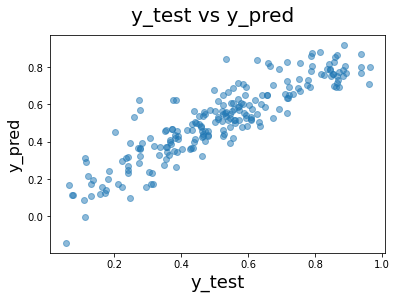

In [64]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [65]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
22,0.110907,0.09
690,0.589508,0.65
554,0.534975,0.84
577,0.827658,0.76
354,0.303497,0.24


In [66]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.07601018407948
MSE: 0.009526747974040298
RMSE: 0.09760506121119078


# R^2 per il test

In [67]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.8010553961928226

## Adjusted R^2 per il test

In [68]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.791536515627886

# Risultati finali
- Train R^2 :0.830
- Train Adjusted R^2 :0.827
- Test R^2 :0.801
- Test Adjusted R^2 :0.719